In [30]:
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt

In [31]:
filePath = '../Resources/Montgomery_Crash_Data.csv'
df = pd.read_csv(filePath)

In [32]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100889 entries, 0 to 100888
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Report Number      100889 non-null  object 
 1   Crash Date/Time    100889 non-null  object 
 2   Weather            100889 non-null  object 
 3   Surface Condition  88836 non-null   object 
 4   Injury Severity    100889 non-null  object 
 5   Vehicle ID         100889 non-null  object 
 6   Vehicle Year       100889 non-null  int64  
 7   Vehicle Make       100883 non-null  object 
 8   Vehicle Model      100864 non-null  object 
 9   Latitude           100889 non-null  float64
 10  Longitude          100889 non-null  float64
 11  geometry           100889 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 9.2+ MB


In [33]:
df_dateTimeSeverity = df[['Crash Date/Time', 'Injury Severity']]
df_dateTimeSeverity.head()
df_dateTimeSeverity.tail()

,Crash Date/Time,Injury Severity
0,2021-04-04 12:00:00,NO APPARENT INJURY
1,2023-12-04 21:37:00,SUSPECTED MINOR INJURY
2,2024-07-17 21:27:00,SUSPECTED MINOR INJURY
3,2016-06-21 09:49:00,NO APPARENT INJURY
4,2016-12-05 06:55:00,SUSPECTED MINOR INJURY


In [34]:
df_dateTimeSeverity.set_index('Crash Date/Time', inplace=True)
df_dateTimeSeverity.index = pd.to_datetime(df_dateTimeSeverity.index)
display(df_dateTimeSeverity.head())
display(df_dateTimeSeverity.tail())

,Injury Severity
Crash Date/Time,
2021-04-04 12:00:00,NO APPARENT INJURY
2023-12-04 21:37:00,SUSPECTED MINOR INJURY
2024-07-17 21:27:00,SUSPECTED MINOR INJURY
2016-06-21 09:49:00,NO APPARENT INJURY
2016-12-05 06:55:00,SUSPECTED MINOR INJURY


,Injury Severity
Crash Date/Time,
2016-04-05 07:09:00,NO APPARENT INJURY
2015-10-01 16:40:00,NO APPARENT INJURY
2024-05-06 15:20:00,SUSPECTED SERIOUS INJURY
2015-12-03 02:37:00,NO APPARENT INJURY
2021-08-22 16:41:00,NO APPARENT INJURY


In [69]:
count = df_dateTimeSeverity["Injury Severity"].value_counts()
display(count)

Injury Severity
No apparent injury          83117
Suspected minor injury      16713
Suspected serious injury      931
Fatal injury                  128
Name: count, dtype: int64

In [71]:
df_dateTimeSeverity = df_dateTimeSeverity.map(lambda x: x.capitalize() if isinstance(x, str) else x)
unique_severity = df_dateTimeSeverity['Injury Severity'].unique()
print(f"The unique_severity colums are as follows {df_dateTimeSeverity}")

The unique_severity colums are as follows                         Injury Severity
Crash Date/Time                        
2015-01-01 00:30:00  No apparent injury
2015-01-01 01:10:00  No apparent injury
2015-01-01 01:14:00  No apparent injury
2015-01-01 01:26:00  No apparent injury
2015-01-01 02:00:00  No apparent injury
...                                 ...
2024-09-25 16:33:00  No apparent injury
2024-09-25 16:45:00  No apparent injury
2024-09-25 17:32:00  No apparent injury
2024-09-25 17:53:00  No apparent injury
2024-09-25 18:16:00  No apparent injury

[100889 rows x 1 columns]


In [36]:
severity_count = df_dateTimeSeverity['Injury Severity'].value_counts()
display(severity_count)

Injury Severity
No apparent injury          83117
Suspected minor injury      16713
Suspected serious injury      931
Fatal injury                  128
Name: count, dtype: int64

In [72]:
count = df_dateTimeSeverity.shape[0]
print(f"The total number of accidents is {count}")

The total number of accidents is 100889


In [38]:
# Sort be date and time
df_dateTimeSeverity = df_dateTimeSeverity.sort_values(by='Crash Date/Time')
display(df_dateTimeSeverity.head())
display(df_dateTimeSeverity.tail())

,Injury Severity
Crash Date/Time,
2015-01-01 00:30:00,No apparent injury
2015-01-01 01:10:00,No apparent injury
2015-01-01 01:14:00,No apparent injury
2015-01-01 01:26:00,No apparent injury
2015-01-01 02:00:00,No apparent injury


,Injury Severity
Crash Date/Time,
2024-09-25 16:33:00,No apparent injury
2024-09-25 16:45:00,No apparent injury
2024-09-25 17:32:00,No apparent injury
2024-09-25 17:53:00,No apparent injury
2024-09-25 18:16:00,No apparent injury


In [39]:
df_dateTimeSeverity.dtypes

Injury Severity    object
dtype: object

In [40]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
df_dateTimeSeverity.dtypes

Injury Severity    object
dtype: object

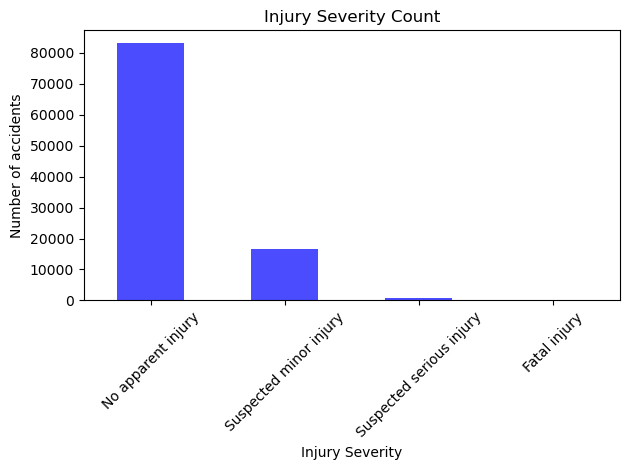

In [92]:
df_dateTimeSeverity['Injury Severity'].value_counts().plot(kind='bar',
                                                        color='blue',
                                                        alpha=0.7, 
                                                        rot=45,
                                                        title='Injury Severity Count',
                                                        xlabel='Injury Severity',
                                                        ylabel='Number of accidents')
plt.tight_layout()
plt.show()


In [42]:
# create a dataframe for each injury severity
df_no_apparent_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'No apparent injury']
df_suspected_minor_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'Suspected minor injury']
df_suspected_serious_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'Suspected serious injury']
df_fatal_injury = df_dateTimeSeverity[df_dateTimeSeverity['Injury Severity'] == 'Fatal injury']

# make a list of the severity dataframes
injury_severity_list = [
    df_no_apparent_injury,
    df_suspected_minor_injury,
    df_suspected_serious_injury,
    df_fatal_injury
]

# display the first 5 rows of each severity dataframe
for i in injury_severity_list:
    display(i.head())

,Injury Severity
Crash Date/Time,
2015-01-01 00:30:00,No apparent injury
2015-01-01 01:10:00,No apparent injury
2015-01-01 01:14:00,No apparent injury
2015-01-01 01:26:00,No apparent injury
2015-01-01 02:00:00,No apparent injury


,Injury Severity
Crash Date/Time,
2015-01-01 02:33:00,Suspected minor injury
2015-01-01 15:18:00,Suspected minor injury
2015-01-01 20:54:00,Suspected minor injury
2015-01-02 12:06:00,Suspected minor injury
2015-01-02 12:24:00,Suspected minor injury


,Injury Severity
Crash Date/Time,
2015-01-03 08:38:00,Suspected serious injury
2015-01-05 11:33:00,Suspected serious injury
2015-01-10 17:26:00,Suspected serious injury
2015-01-15 11:31:00,Suspected serious injury
2015-01-20 19:07:00,Suspected serious injury


,Injury Severity
Crash Date/Time,
2015-04-06 16:57:00,Fatal injury
2015-05-31 15:05:00,Fatal injury
2015-06-23 20:26:00,Fatal injury
2015-07-05 05:07:00,Fatal injury
2015-07-28 21:24:00,Fatal injury


In [43]:
# Display the total number of accidents for each severity
for i in injury_severity_list:
    display(f"Total number {i["Injury Severity"].iloc[0]} {len(i)}")

'Total number No apparent injury 83117'

'Total number Suspected minor injury 16713'

'Total number Suspected serious injury 931'

'Total number Fatal injury 128'

In [65]:
# make a new dataframe with the time of day and hour of accident
def makeNewDataFrame(df):
    df = df.copy()
    df['Time of Day'] = df.index.time
    df['HourOfAccident'] = pd.to_datetime(df['Time of Day'], format='%H:%M:%S').dt.hour
    return df

df_fatal_injury = makeNewDataFrame(df_fatal_injury)
df_suspected_serious_injury = makeNewDataFrame(df_suspected_serious_injury)
df_suspected_minor_injury = makeNewDataFrame(df_suspected_minor_injury)
df_no_apparent_injury = makeNewDataFrame(df_no_apparent_injury)

# make a list of the injury dataframes
df_injury_list = [df_no_apparent_injury,
                df_suspected_minor_injury,
                df_suspected_serious_injury,
                df_fatal_injury]

# display the first 5 rows of each injury dataframe
for i in df_injury_list: 
    display(i.head())

,Injury Severity,Time of Day,HourOfAccident,DayOfAccident
Crash Date/Time,,,,
2015-01-01 00:30:00,No apparent injury,00:30:00,0,0
2015-01-01 01:10:00,No apparent injury,01:10:00,1,1
2015-01-01 01:14:00,No apparent injury,01:14:00,1,1
2015-01-01 01:26:00,No apparent injury,01:26:00,1,1
2015-01-01 02:00:00,No apparent injury,02:00:00,2,2


,Injury Severity,Time of Day,HourOfAccident,DayOfAccident
Crash Date/Time,,,,
2015-01-01 02:33:00,Suspected minor injury,02:33:00,2,2
2015-01-01 15:18:00,Suspected minor injury,15:18:00,15,15
2015-01-01 20:54:00,Suspected minor injury,20:54:00,20,20
2015-01-02 12:06:00,Suspected minor injury,12:06:00,12,12
2015-01-02 12:24:00,Suspected minor injury,12:24:00,12,12


,Injury Severity,Time of Day,HourOfAccident,DayOfAccident
Crash Date/Time,,,,
2015-01-03 08:38:00,Suspected serious injury,08:38:00,8,8
2015-01-05 11:33:00,Suspected serious injury,11:33:00,11,11
2015-01-10 17:26:00,Suspected serious injury,17:26:00,17,17
2015-01-15 11:31:00,Suspected serious injury,11:31:00,11,11
2015-01-20 19:07:00,Suspected serious injury,19:07:00,19,19


,Injury Severity,Time of Day,HourOfAccident,DayOfAccident
Crash Date/Time,,,,
2015-04-06 16:57:00,Fatal injury,16:57:00,16,16
2015-05-31 15:05:00,Fatal injury,15:05:00,15,15
2015-06-23 20:26:00,Fatal injury,20:26:00,20,20
2015-07-05 05:07:00,Fatal injury,05:07:00,5,5
2015-07-28 21:24:00,Fatal injury,21:24:00,21,21


In [112]:
# Function to graph the time of day for each injury severity

def graph_injury_severity(df):
    plt.figure(figsize=(8, 5))
    plt.hist(df['HourOfAccident'], bins=24, color='blue', alpha=0.7, rwidth=0.80)
    time_labels = [f'{str(i).zfill(2)}:00' for i in range(24)]
    plt.title('Time of Day')
    plt.grid(axis='y')
    plt.title(f'{i["Injury Severity"].iloc[0]} Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Accident Count')
    plt.xticks(range(24), time_labels, rotation=45)
    plt.tight_layout()
    plt.show()

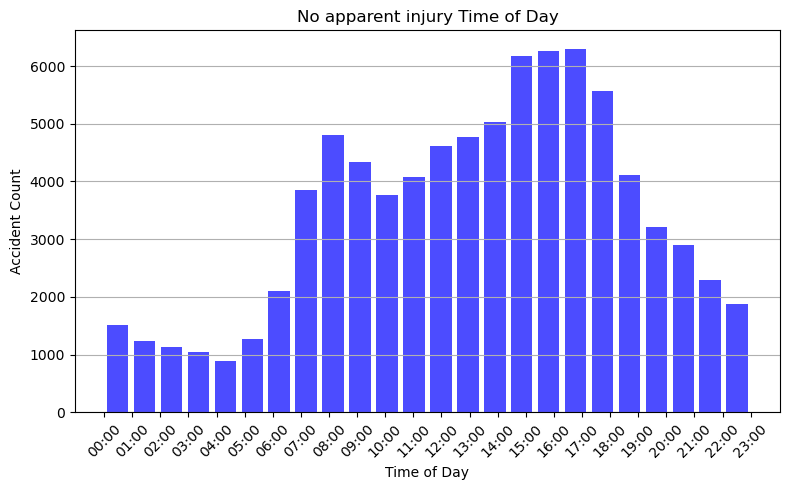

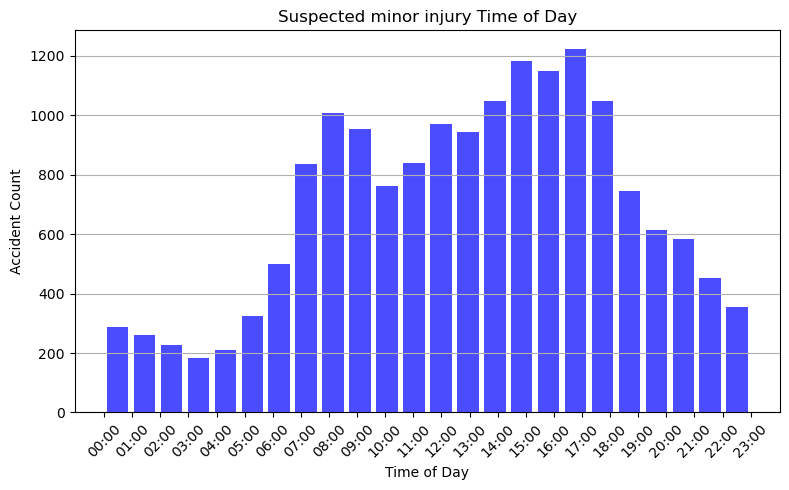

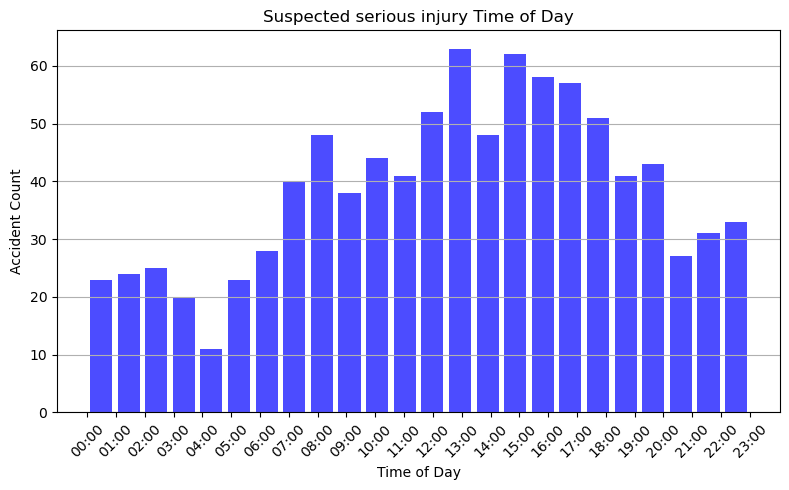

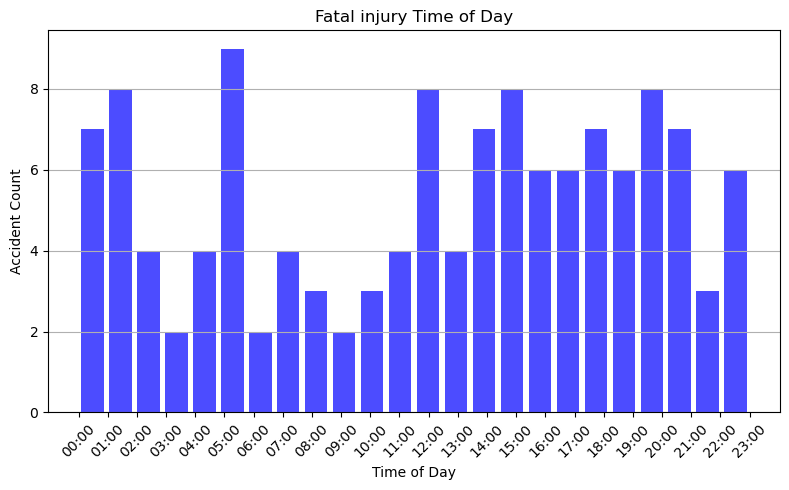

In [113]:
# Graph the time of day for each injury severity
for i in df_injury_list:
    graph_injury_severity(i)  

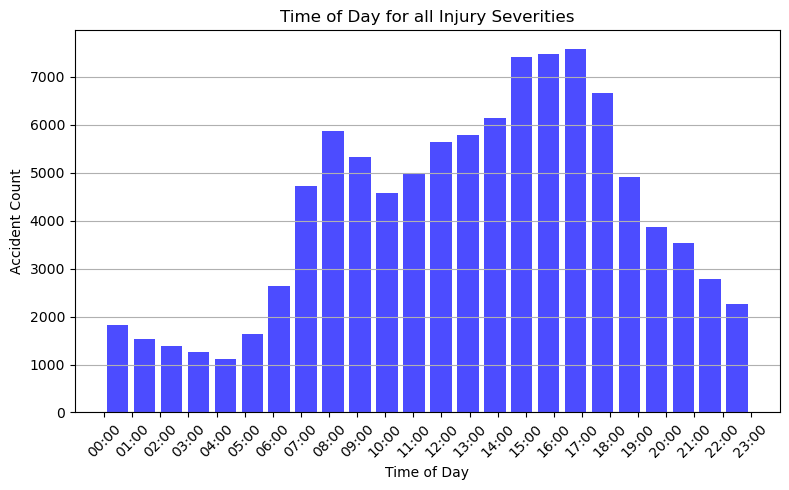

In [110]:
# Graph the time of day for all injury severities
plt.figure(figsize=(8, 5))
plt.hist(df['HourOfAccident'], bins=24, color='blue', alpha=0.7, rwidth=0.8)
time_labels = [f'{str(i).zfill(2)}:00' for i in range(24)]
plt.title('Time of Day')
plt.grid(axis='y')
plt.title(f'Time of Day for all Injury Severities')
plt.xlabel('Time of Day')
plt.ylabel('Accident Count')
plt.xticks(range(24), time_labels, rotation=45)
plt.tight_layout()
plt.show()

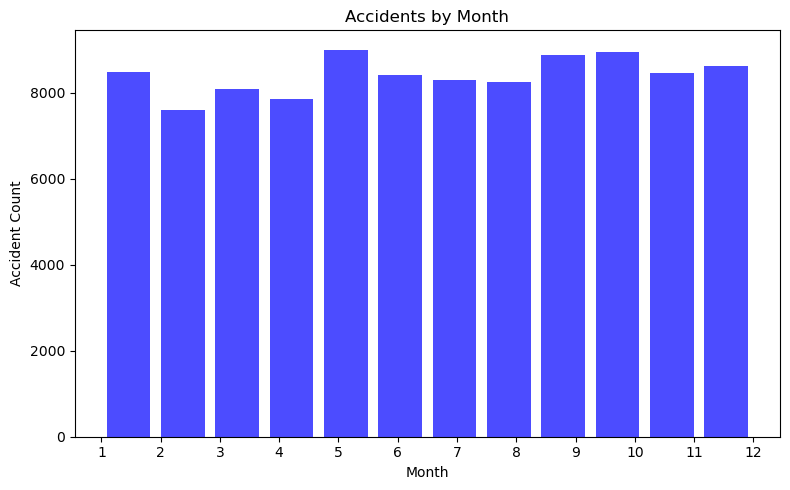

In [114]:
# Accients by month
df_dateTimeSeverity['Month'] = df_dateTimeSeverity.index.month
plt.figure(figsize=(8, 5))
plt.hist(df_dateTimeSeverity['Month'], bins=12, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

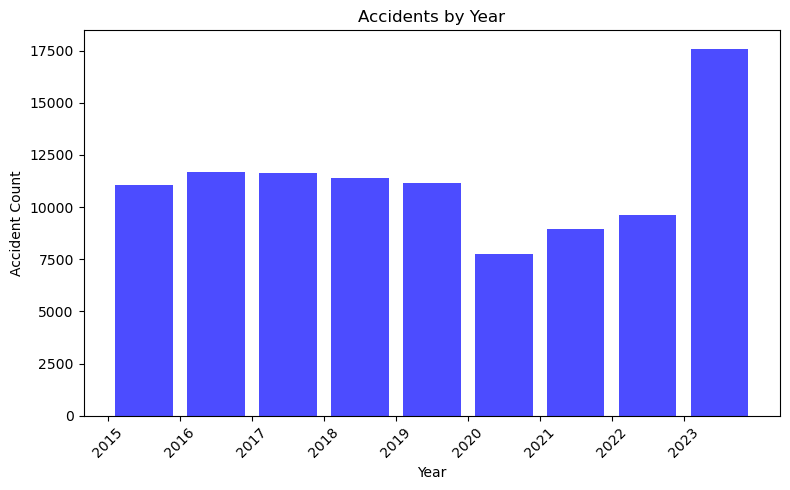

,Injury Severity,Month,Year
Crash Date/Time,,,
2024-09-25 16:33:00,No apparent injury,9,2024
2024-09-25 16:45:00,No apparent injury,9,2024
2024-09-25 17:32:00,No apparent injury,9,2024
2024-09-25 17:53:00,No apparent injury,9,2024
2024-09-25 18:16:00,No apparent injury,9,2024


In [109]:
# Plot accidents by year    
df_dateTimeSeverity['Year'] = df_dateTimeSeverity.index.year
plt.figure(figsize=(8, 5))
plt.hist(df_dateTimeSeverity['Year'], bins=9, color='blue', alpha=0.7, rwidth=0.8)
plt.title('Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.xticks(range(2015, 2024), rotation=45)
plt.tight_layout()

plt.show()

display(df_dateTimeSeverity.tail())